In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer,StandardScaler
from scipy.stats.stats import pearsonr
from sklearn.feature_selection import SelectKBest,SelectPercentile,RFE,RFECV,SelectFromModel
from sklearn.svm import SVR,SVC
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

/Users/weiyansun/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data=pd.read_csv("movie_metadata_new.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,6900.0,3900.0,Zoe Saldana,5300.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,8200.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,565.0,5000.0,Geoffrey Rush,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,2900.0,7.1,2.35,5200.0
2,Color,Sam Mendes,602.0,148.0,2200.0,1700.0,Christoph Waltz,8300.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,11000.0,6.8,2.35,86000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,27000.0,Gary Oldman,23000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,10000.0,8.5,2.35,164000.0
4,NaN,J.J. Abrams,NaN,NaN,14000.0,2000.0,Mark Hamill,11000.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,4400.0,7.1,NaN,263000.0


In [15]:
numeric_data=data.select_dtypes(exclude=['object'])

In [18]:
score=numeric_data['imdb_score']
numeric_data=numeric_data.drop(['imdb_score'],axis=1)

In [13]:
imp = Imputer(missing_values="NaN",strategy="mean",axis=0)      #default values
numeric_data[numeric_data.columns]=imp.fit_transform(numeric_data)

In [45]:
scaler = StandardScaler()
numeric_data[numeric_data.columns] = scaler.fit_transform(numeric_data[numeric_data.columns])

In [30]:
low_covariance_1 = []
low_covariance_2 = []
low_covariance_15 = []
low_covariance_2g = []
for x in numeric_data.columns:
    z = (np.corrcoef(numeric_data[x],y=score))
    if(np.fabs(z[0,1]) < 0.1):
        low_covariance_1.append(x)
    elif(np.fabs(z[0,1]) < 0.15):
        low_covariance_15.append(x)
    elif(np.fabs(z[0,1])<0.2):
        low_covariance_2.append(x)
    else:
        low_covariance_2g.append(x)

In [33]:
print low_covariance_2g, "\n", low_covariance_2, "\n", low_covariance_15, "\n", low_covariance_1

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'num_user_for_reviews', 'title_year', 'movie_facebook_likes'] 
['gross'] 
['actor_1_facebook_likes'] 
['actor_3_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'aspect_ratio']


In [43]:
svr_linear_model = LinearSVR()


In [54]:
svr_model = SVR(kernel='rbf') #default


In [44]:
svr_poly_model = SVR(kernel="poly") #default degree is 3
svr_poly_model.score?

In [49]:
def split_data(x_data,y_data,size=0.1):
    return train_test_split(x_data,y_data,test_size=size)

In [50]:
training_x,test_x,training_Y,test_y = split_data(numeric_data,score)

In [51]:
training_x

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
3684,-0.563658,-3.259900e-01,-0.358372,-0.504880,-0.687646,-0.779407,-0.592253,-0.828022,-0.681911,-0.691411,-0.174954,0.853346,-0.461473,-0.276621,-0.453100
2858,2.883044,3.175705e-02,-0.281328,0.343534,-0.241880,-0.370472,1.486514,-0.441360,-0.681911,0.896785,-0.126430,1.015433,-0.440419,0.096784,5.192134
1714,-0.241304,5.715961e+00,0.096979,-0.356875,2.481127,-0.694506,0.991770,0.574490,3.296646,0.589221,-0.049814,-1.496916,-0.189977,-0.276621,0.189003
3507,-0.935604,-1.876227e+00,-0.360347,0.453575,-0.241880,0.000000,-0.298012,-0.214220,-0.184592,-0.503161,0.000000,0.000000,-0.105082,10.290755,-0.125627
1234,0.461261,3.497545e-01,-0.346848,0.095942,-0.155435,0.095666,0.221171,1.761634,2.799327,-0.227414,0.011479,0.934390,-0.156019,0.096784,0.137424
4392,-1.117444,5.648769e-16,-0.361335,-0.428126,-0.680586,-0.738060,-0.600269,-0.629292,1.804687,-0.683457,0.000000,0.610216,-0.339393,0.096784,-0.451088
4651,-1.142241,-1.160733e+00,-0.363640,-0.509006,-0.688366,0.000000,-0.604089,-0.831869,-0.184592,-0.717925,-0.198449,0.691259,-0.461473,10.290755,-0.480333
2236,-0.307428,-7.234868e-01,0.492077,0.976268,11.845966,-0.443266,-0.565720,3.928201,1.307367,-0.625126,0.001264,0.529172,-0.382011,-0.276621,-0.459134
2762,2.296195,5.087532e-01,0.294528,-0.325513,-0.472399,1.493810,4.032084,-0.544109,-0.681911,1.973258,-0.126430,0.448129,-0.452134,0.096784,0.189003
4954,-1.150506,-1.200483e+00,-0.361664,-0.507906,-0.687502,0.000000,-0.603519,-0.808094,-0.681911,-0.709971,-0.202520,0.042911,-0.461473,0.000000,-0.481468


In [53]:
svr_linear_model.fit(X=training_x,y=training_Y)
predicted_y = svr_linear_model.predict(test_x)
training_score = svr_linear_model.score(training_x,training_Y)
training_score

0.26059889339843834

In [57]:
svr_model.fit(X=training_x,y=training_Y)
predicted_y = svr_model.predict(test_x)
training_score = svr_model.score(training_x,training_Y)
training_score

0.46041142891529119

In [56]:
svr_poly_model.fit(X=training_x,y=training_Y)
predicted_y = svr_poly_model.predict(test_x)
training_score = svr_poly_model.score(training_x,training_Y)
training_score

0.24008971546567681

In [63]:
default_knn = KNeighborsRegressor(n_neighbors=5)
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_20 = KNeighborsRegressor(n_neighbors=20)

In [72]:
default_knn.fit(X=training_x,y=training_Y)
predicted_y = default_knn.predict(test_x)
training_score = default_knn.score(training_x,training_Y)
training_score

0.54442719048344723

In [73]:
mean_absolute_error(test_y, predicted_y)
#r2_score(test_y, predicted_y)

0.71794059405940591

In [67]:
default_knn.score


In [65]:
knn_10.fit(X=training_x,y=training_Y)
predicted_y = knn_10.predict(test_x)
training_score = knn_10.score(training_x,training_Y)
training_score

0.46874908818134026

In [66]:
knn_20.fit(X=training_x,y=training_Y)
predicted_y = knn_20.predict(test_x)
training_score = knn_20.score(training_x,training_Y)
training_score

0.41142973773999481

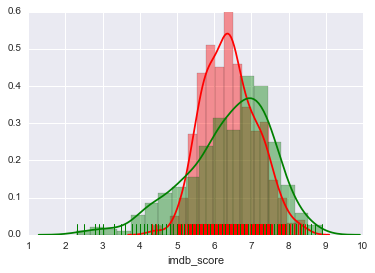

In [78]:
sns.distplot(predicted_y,hist=True,rug=True,color="red").legend()
sns.distplot(test_y,hist=True,rug=True,color="green").legend()

In [79]:
sns.distplot?